<a href="https://colab.research.google.com/github/rutasnim/Mountain_webscrapping/blob/main/Mountain_scrapper_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping and Analyzing List of highest mountains on Earth 
In this notebook, I scrapped data from wikipedia page containing List of highest mountains on Earth using beautifulsoup and request. 

I loaded the scrapped data in pandas dataframe and performed exploratory data analysis 

## 1. Web Scraping 

In [1]:
# Importing the required libraries
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

###  Downloading URL using requests


In [2]:
# Downloading contents of the web page
url = "https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth"
data = requests.get(url).text

### Creating BeautifulSoup object

In [3]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# Verifying tables and their classes
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))


Classes of each table:
['box-Original_research', 'plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-Original_research']
['noprint', 'infobox']
['wikitable', 'sortable']


In [5]:
# Our piece of code tells us we want the second table (aka. class = ‘wikitable’ and ‘sortable’)
#  Looking for the table with the classes 'wikitable' and 'sortable'
table = soup.find('table', class_='wikitable sortable')

### Data Collection & Extraction

In [6]:
# Defining of the dataframe
df = pd.DataFrame(columns=['Rank','Mountain_name','Height_m', 'Height_ft', 'Prominence_m', 'Prominence_ft',
                                        'Range','Coordinates', 'Parent_mountain','Succesful_attempt_yr',
                                        'Succesful_attempts', 'Failed_attempts','Country'])

# Collecting data
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    col = row.find_all('td')
    # Extracting data . .text removes the tags from entries.
    # done additional stripping and breaking down.
    if(col != []):
        rank =col[0].text.strip()
        name = col[1].a.text.strip()
        height_m = col[2].text.strip()
        height_ft= col[3].text.split("[")[0].strip()
        prominence_m =col[4].text.strip()
        prominence_ft= col[5].text.strip()
        Range = col[6].text.split()
        coordinates = col[7].text.split('/')[0]
        parent_mountain=col[8].text.strip()
        first_attempt=col[9].text.strip()
        success_attempts= col[10].text.split("[")[0].strip()
        failed_attempts=col[11].text.strip().split("[")[0].strip()
        #Country column extraction
        anchors=col[12].find_all("a")
        
        l=[]
        for x in anchors:
            l.append((x.text.strip("[dp0123456789]")).strip(''))
            Country=[]
            for element in l:
                if element.strip():
                    Country.append(element)
        # appending the rows in the df
        df = df.append({'Rank': rank, 'Mountain_name': name,'Height_m':height_m,'Height_ft': height_ft,
                    'Prominence_m': prominence_m,'Prominence_ft': prominence_ft,'Range':Range,
                    'Coordinates': coordinates,'Parent_mountain':parent_mountain,
                    'Succesful_attempt_yr': first_attempt,'Succesful_attempts':success_attempts,
                    'Failed_attempts': failed_attempts,'Country':Country}, ignore_index=True)

In [7]:
df.head()

,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country
0,1,Mount Everest,"8,848","29,029","8,848","29,029","[Mahalangur, Himalaya]",".mw-parser-output .geo-default,.mw-parser-outp...",—,1953,145,121,"[Nepal, China]"
1,2,K2,"8,611","28,251","4,020","13,190","[Baltoro, Karakoram]",35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44,"[Pakistan, China]"
2,3,Kangchenjunga,"8,586","28,169","3,922","12,867","[Kangchenjunga, Himalaya]",27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24,"[Nepal, India]"
3,4,Lhotse,"8,516","27,940",610,"2,000","[Mahalangur, Himalaya]",27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26,"[China, Nepal]"
4,5,Makalu,"8,485","27,838","2,378","7,802","[Mahalangur, Himalaya]",27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,—,"[Nepal, China]"


In [8]:
df.tail()

,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country
115,104,Noijin Kangsang,"7,206","23,642","2,160","7,090","[Nagarze, Himalaya]",28°56′48″N 90°10′42″E﻿,Gangkhar Puensum,1986,4,1,[China]
116,105,Langtang Ri,"7,205","23,638",665,"2,182","[Langtang, Himalaya]",28°22′53″N 85°41′01″E﻿,Shishapangma,1981,4,0,"[Nepal, China]"
117,106,Kangphu Kang,"7,204","23,635","1,244","4,081","[Lunana, Himalaya]",28°09′24″N 90°04′15″E﻿,Tongshanjiabu,2002,1,0,"[Bhutan, China]"
118,107,Singhi Kangri,"7,202","23,629",730,"2,400","[Siachen, Karakoram]",35°35′59″N 76°59′01″E﻿,Teram Kangri III,1976,2,0,"[India, China]"
119,108,Lupghar Sar,"7,200","23,600",730,"2,400","[Hispar, Karakoram]",36°21′01″N 75°02′13″E﻿,Momhil Sar,1979,1,0,[Pakistan]


## 2. Data Cleaning & Transformation
- In our scraped data, first row "Coordinates" column did not get the correct coordinates. Therefore, we are changing the coordinates with the right coordinates

In [9]:
df['Coordinates'].loc[df['Mountain_name']=='Mount Everest']='27°59′17″N 86°55′31″E'


```RANK``` Column has "S" values for same Rank as the previous row:


In [10]:
x='S'
df.query('Rank==@x')

,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country
15,S,Gasherbrum III,"7,946","26,070",355,"1,165","[Baltoro, Karakoram]",35°45′33″N 76°38′30″E﻿,Gasherbrum II,1975,2,2,"[Pakistan, China]"
21,S,Nuptse,"7,864","25,801",305,"1,001","[Mahalangur, Himalaya]",27°58′03″N 86°53′13″E﻿,Lhotse,1961,5,12,[Nepal]
35,S,Molamenqing,"7,703","25,272",433,"1,421","[Langtang, Himalaya]",28°21′18″N 85°48′35″E﻿,Shishapangma,1981,1,0,[China]
39,S,Dhaulagiri IV,"7,661","25,135",469,"1,539","[Dhaulagiri, Himalaya]",28°44′09″N 83°18′55″E﻿,Dhaulagiri II,1975,2,10,[Nepal]
41,S,Dhaulagiri V,"7,618","24,993",340,"1,120","[Dhaulagiri, Himalaya]",28°44′02″N 83°21′41″E﻿,Dhaulagiri IV,1975,2,3,[Nepal]
51,S,Annapurna IV,"7,525","24,688",255,837,"[Annapurna, Himalaya]",28°32′15″N 84°4′58″E﻿,Annapurna,1955,43,18,[Nepal]
66,S,Sunanda Devi,"7,434","24,390",229,751,"[Garhwal, Himalaya]",30°22′00″N 79°59′40″E﻿,Nanda Devi,1939,14,12,[India]
83,S,Abi Gamin,"7,355","24,131",217,712,"[Garhwal, Himalaya]",30°55′57″N 79°36′09″E﻿,Kamet,1950,17,2,"[India, China]"
84,S,Gimmigela Chuli,"7,350","24,110",432,"1,417","[Kangchenjunga, Himalaya]",27°44′27″N 88°09′31″E﻿,Kangchenjunga,1994,3,1,"[India, Nepal]"
85,S,Nangpai Gosum,"7,350","24,110",427,"1,401","[Mahalangur, Himalaya]",28°04′24″N 86°36′51″E﻿,Cho Oyu,1986,,1,"[Nepal, China]"


**Changing "S" Values in ```Rank``` column to number as the previous row values:**

In [15]:
rank=[]
for i, row in df.iterrows():
  #print(i, row['Rank'])
  if row['Rank']=='S':
    rank.append(df._get_value(i-1, 'Rank'))
  
  else:
    rank.append(row['Rank'])

#rank
df['Rank']=rank
    

### Display data types

In [18]:
print(df.dtypes)

Rank                    object
Mountain_name           object
Height_m                object
Height_ft               object
Prominence_m            object
Prominence_ft           object
Range                   object
Coordinates             object
Parent_mountain         object
Succesful_attempt_yr    object
Succesful_attempts      object
Failed_attempts         object
Country                 object
dtype: object


In [19]:
#change the data types for the following columns
df['Height_m']=df['Height_m'].str.replace(',', '').astype(float)
df['Height_ft']=df['Height_ft'].str.replace(',', '').astype(float)

df['Prominence_m']=df['Prominence_m'].str.replace(',', '').astype(float)
df['Prominence_ft']=df['Prominence_ft'].str.replace(',', '').astype(float)

# take out "none" and convert to float
df['Succesful_attempt_yr']=df['Succesful_attempt_yr'].str.replace("none", '')
df['Succesful_attempt_yr']=pd.to_numeric(df['Succesful_attempt_yr'],downcast="integer")

df['Succesful_attempts']=df['Succesful_attempts'].str.replace("many", '')
df['Succesful_attempts']=df['Succesful_attempts'].str.replace( "—",'')
df['Succesful_attempts']=pd.to_numeric(df['Succesful_attempts'],downcast="integer")

df['Failed_attempts']=df['Failed_attempts'].str.replace("many", '')
df['Failed_attempts']=df['Failed_attempts'].str.replace("—",'')
df['Failed_attempts']=pd.to_numeric(df['Failed_attempts'],downcast="integer")
df['Rank']=pd.to_numeric(df['Rank'])

In [20]:
# Display data types
print(df.dtypes)

Rank                      int64
Mountain_name            object
Height_m                float64
Height_ft               float64
Prominence_m            float64
Prominence_ft           float64
Range                    object
Coordinates              object
Parent_mountain          object
Succesful_attempt_yr    float64
Succesful_attempts      float64
Failed_attempts         float64
Country                  object
dtype: object


In [22]:
#Changing data types float to int
df['Succesful_attempt_yr'] = df['Succesful_attempt_yr'].astype('Int64')
df['Failed_attempts'] = df['Failed_attempts'].astype('Int64')
df['Succesful_attempts'] = df['Succesful_attempts'].astype('Int64')

### Exporting to CSV:

In [23]:
df.to_csv('mountain.csv',index=False)

## 3. Data Analysis
Exploratory data analysis is an important step to analyze the data.
- Summarize main characteristics
- Visualize data distribution
- Handle missing values and outliers
- Form hypotheses 

### 1. Summarize Main Characteristics

In [17]:
# Display the size of the dataset
print(df.shape)

(120, 13)


In [24]:
# Display data types
print(df.dtypes)

Rank                      int64
Mountain_name            object
Height_m                float64
Height_ft               float64
Prominence_m            float64
Prominence_ft           float64
Range                    object
Coordinates              object
Parent_mountain          object
Succesful_attempt_yr      Int64
Succesful_attempts        Int64
Failed_attempts           Int64
Country                  object
dtype: object


In [25]:
#check for missing values
df.isnull().sum()

Rank                    0
Mountain_name           0
Height_m                0
Height_ft               0
Prominence_m            0
Prominence_ft           0
Range                   0
Coordinates             0
Parent_mountain         0
Succesful_attempt_yr    4
Succesful_attempts      4
Failed_attempts         4
Country                 0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  120 non-null    int64  
 1   Mountain_name         120 non-null    object 
 2   Height_m              120 non-null    float64
 3   Height_ft             120 non-null    float64
 4   Prominence_m          120 non-null    float64
 5   Prominence_ft         120 non-null    float64
 6   Range                 120 non-null    object 
 7   Coordinates           120 non-null    object 
 8   Parent_mountain       120 non-null    object 
 9   Succesful_attempt_yr  116 non-null    Int64  
 10  Succesful_attempts    116 non-null    Int64  
 11  Failed_attempts       116 non-null    Int64  
 12  Country               120 non-null    object 
dtypes: Int64(3), float64(4), int64(1), object(5)
memory usage: 12.7+ KB


### Unconquered mountains 
While checking for missing values, we find that there are 4 values in First_attempt_year. There are 4 high mountains out of the top 120 highest mountain that have not been conquered yet!!

Lets find out those unconquered mountain names and locations

In [27]:
df1=df.loc[df['Succesful_attempt_yr'].isnull()]
df1[['Mountain_name', 'Height_m','Country']]

,Mountain_name,Height_m,Country
44,Gangkhar Puensum,7570.0,"[Bhutan, China]"
104,Labuche Kang III,7250.0,[China]
110,Karjiang,7221.0,[China]
113,Tongshanjiabu,7207.0,"[Bhutan, China]"


In [30]:
df1= df.query('Height_m >8000')
df1[['Mountain_name', 'Height_m','Country', 'Succesful_attempts']][:5]

,Mountain_name,Height_m,Country,Succesful_attempts
0,Mount Everest,8848.0,"[Nepal, China]",145
1,K2,8611.0,"[Pakistan, China]",45
2,Kangchenjunga,8586.0,"[Nepal, India]",38
3,Lhotse,8516.0,"[China, Nepal]",26
4,Makalu,8485.0,"[Nepal, China]",45


### Which mountain was the earliest conquered?


In [33]:
print('The first high mountain was conquered in the year:')
df['Succesful_attempt_yr'].min()

The first high mountain was conquered in the year:


1930

In [34]:
df2=df.dropna().nsmallest(5,'Succesful_attempt_yr')
df2[['Rank','Mountain_name', 'Country', 'Succesful_attempt_yr', 'Failed_attempts']]

,Rank,Mountain_name,Country,Succesful_attempt_yr,Failed_attempts
62,57,Jongsong Peak,"[India, China, Nepal]",1930,3
30,29,Kamet,[India],1931,14
45,41,Gongga Shan,[China],1932,7
69,63,Sia Kangri,"[Pakistan, China]",1934,0
112,101,Khartaphu,[China],1935,0


Looks like the early mountain that was conquered in 1930s were not in the top 10 high mountains. 


---


**Lets find out whenhigh mountains were climbed first time:**

In [47]:
df.query("Height_m >8000")[['Mountain_name','Country', 'Succesful_attempt_yr']]

,Mountain_name,Country,Succesful_attempt_yr
0,Mount Everest,"[Nepal, China]",1953
1,K2,"[Pakistan, China]",1954
2,Kangchenjunga,"[Nepal, India]",1955
3,Lhotse,"[China, Nepal]",1956
4,Makalu,"[Nepal, China]",1955
5,Cho Oyu,"[China, Nepal]",1954
6,Dhaulagiri I,[Nepal],1960
7,Manaslu,[Nepal],1956
8,Nanga Parbat,[Pakistan],1953
9,Annapurna I,[Nepal],1950


▶***By 1950s, all 8000 meters mountains had been climbed starting with Mt. Annapurna in 1950.***

### First successful attemp year distribution

The year the most mountains has been conquered:


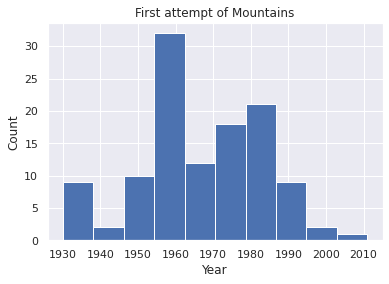

In [56]:
sns.set()
yr = np.array(df['Succesful_attempt_yr'].dropna())
plt.hist(yr)
plt.title("First attempt of Mountains")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

▶**Of all the hight mountains, most mountains were climbed in the 1960s.**

### Height Distribution

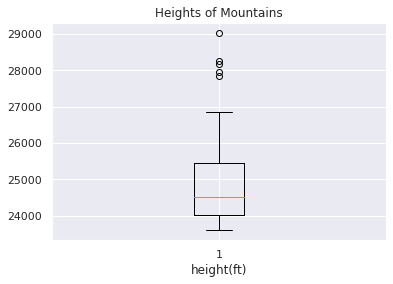

In [ ]:
plt.boxplot(height)
plt.title("Heights of Mountains")
plt.xlabel("height(ft)")
plt.show()

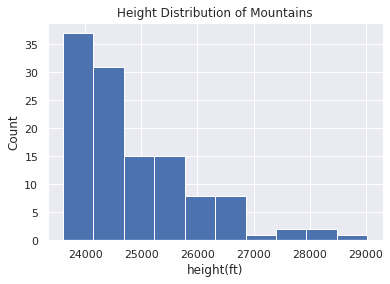

In [ ]:
height = np.array(df['Height_ft'])
plt.hist(height)
plt.title("Height Distribution of Mountains")
plt.xlabel("height(ft)")
plt.ylabel("Count")
plt.show()

### Which mountain had the most sucessful attempst?

In [57]:
df[['Mountain_name','Succesful_attempts', 'Failed_attempts']].loc[df['Succesful_attempts']==df['Succesful_attempts'].max()]

,Mountain_name,Succesful_attempts,Failed_attempts
0,Mount Everest,145,121


*It is no surprise that Mt. Everest has the most successful attempts ( 145) because of the fascination of conquering the tallest mountain on earth and rapid commercialization of Mt. Everest climbs.*




### Feature Engineering

- Add columns, 
`total_attempts= Failed_attempts + Success_attempts and also add Percent_success= (success_attempts/total_attempts)*100`

`Percent_success= (success_attempts/total_attempts)*100`


In [58]:
df['Total_attempts']=df['Failed_attempts']+df['Succesful_attempts']
df['Percent_success']=(df['Succesful_attempts']/df['Total_attempts'])*100
df.head()

,Rank,Mountain_name,Height_m,Height_ft,Prominence_m,Prominence_ft,Range,Coordinates,Parent_mountain,Succesful_attempt_yr,Succesful_attempts,Failed_attempts,Country,Total_attempts,Percent_success
0,1,Mount Everest,8848.0,29029.0,8848.0,29029.0,"[Mahalangur, Himalaya]",27°59′17″N 86°55′31″E,—,1953,145,121,"[Nepal, China]",266,54.511278
1,2,K2,8611.0,28251.0,4020.0,13190.0,"[Baltoro, Karakoram]",35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44,"[Pakistan, China]",89,50.561798
2,3,Kangchenjunga,8586.0,28169.0,3922.0,12867.0,"[Kangchenjunga, Himalaya]",27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24,"[Nepal, India]",62,61.290323
3,4,Lhotse,8516.0,27940.0,610.0,2000.0,"[Mahalangur, Himalaya]",27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26,"[China, Nepal]",52,50.0
4,5,Makalu,8485.0,27838.0,2378.0,7802.0,"[Mahalangur, Himalaya]",27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,<NA>,"[Nepal, China]",<NA>,<NA>


### Let's look at the top 5 succesful attempts?


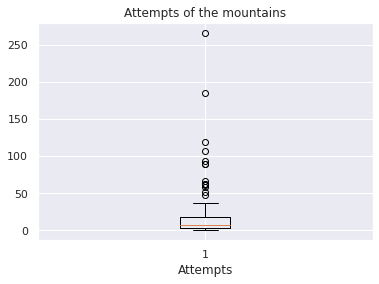

In [ ]:
attempt = np.array(df.dropna()['Total_attempts'])
plt.boxplot(attempt)
plt.title("Attempts of the mountains")
plt.xlabel("Attempts")
plt.show()

In [28]:
df[['Mountain_name','Succesful_attempts','Failed_attempts','Percent_success']].loc[df['Rank']<10].nlargest(5, 'Percent_success')

KeyError: ignored

In [ ]:
df['Suc].groupby['Country']

TypeError: ignored

Bigger mountain is outliers. Data distribution follows a 

- first attempt
- Most attempts?
- succes rates?
- height distribution
 - attempst distribution
 - unconquered mountains

https://medium.com/geekculture/data-exploration-in-python-height-and-weight-of-nhl-players-using-3-methods-bf33c52692ce

- learn about box plot and hist plot
- to-do
- finish cleaning data 
-- (Rank change format to Float with S)
-- groupby country name
-- top attempts 
- blog post and readme

